In [246]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm


In [247]:
#Cargamos base de datos
Autos = pd.read_csv(r"C:\Users\leora\OneDrive\Documentos\Profesional\Semestre 7\Bloque 1\Estadística\Momento de Retroalimentación\precios_autos.csv")
#Renombramos columnas
Autos.rename(columns={'symboling':'Symboling', 'CarName':'Car_name', 'fueltype':'Fuel_type', 'carbody':'Car_body', 'drivewheel':'Drive_wheel', 'enginelocation':'Engine_loc', 'wheelbase':'Wheel_base','carlength':'Length',
                      'carwidth':'Width', 'carheight':'Height', 'curbweight':'Weight', 'enginetype':'Engine_type', 'cylindernumber':'Cylinder_num','enginesize':'Engine_size',
                      'stroke':'Stroke', 'compressionratio':'Comp_ratio', 'horsepower':'Horse_power','peakrpm':'Peak_rpm','citympg':'City_mpg','highwaympg':'Highway_mpg', 'price':'Price'}, inplace=True)

#Visualizamos algunos registros
Autos.head()

,Symboling,Car_name,Fuel_type,Car_body,Drive_wheel,Engine_loc,Wheel_base,Length,Width,Height,...,Engine_type,Cylinder_num,Engine_size,Stroke,Comp_ratio,Horse_power,Peak_rpm,City_mpg,Highway_mpg,Price
0,3,alfa-romero giulia,gas,convertible,rwd,front,88.6,168.8,64.1,48.8,...,dohc,four,130,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,convertible,rwd,front,88.6,168.8,64.1,48.8,...,dohc,four,130,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,ohcv,six,152,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,sedan,fwd,front,99.8,176.6,66.2,54.3,...,ohc,four,109,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,sedan,4wd,front,99.4,176.6,66.4,54.3,...,ohc,five,136,3.40,8.0,115,5500,18,22,17450.0


# 1. Variables Cuantitativas

Calculamos algunas medidas estadísticas de tendencia central y no central de las variables cuantitativas, así como su curtosis y sesgo para comparar simetría.

In [248]:
k = 4   #Número de decimales a redondear para cada medida estadística
Var = ['Price', 'Wheel_base', 'Length', 'Width', 'Height', 'Weight', 'Engine_size', 'Stroke', 'Comp_ratio', 'Horse_power', 'Peak_rpm']
Summary = {}
for i in Var:
    key = f'Summary_{i}'
    mean = round(np.mean(Autos[i]), k)
    sd = round(np.std(Autos[i]), k)
    skew = round(stats.skew(Autos[i]), k)
    kurt = round(stats.kurtosis(Autos[i]), k)

    Summary[key] = {f'Media_{i}': mean, f'Desvest_{i}': sd, f'Sesgo_{i}': skew, f'Curtosis_{i}': kurt}

#En el diccionario Summary se encuentra el resumen de las 4 medidas estadísticas calculadas para cada una de las variables numéricas incluidas en la lista Var


#Creamos una dataframe que contenga los valores guardados en el diccionario Summary para visualizar los datos de una amnera más organizada:
data = []
for i in Var:
    summary_key = f'Summary_{i}'
    row = [i]
    for stat in ['Media', 'Desvest', 'Sesgo', 'Curtosis']:
        row.append(Summary[summary_key][f'{stat}_{i}'])
    data.append(row)

# Crear el DataFrame
columns = ['Variable', 'Media', 'Desvest', 'Sesgo', 'Curtosis']
df_summary = pd.DataFrame(data, columns=columns)

# Mostrar el DataFrame
df_summary.head(10)

,Variable,Media,Desvest,Sesgo,Curtosis
0,Price,13276.7106,7969.3435,1.7646,2.9486
1,Wheel_base,98.7566,6.0071,1.0425,0.9633
2,Length,174.0493,12.3072,0.1548,-0.1100
3,Width,65.9078,2.1400,0.8974,0.6566
4,Height,53.7249,2.4376,0.0627,-0.4622
5,Weight,2555.5659,519.4087,0.6764,-0.0709
6,Engine_size,126.9073,41.5410,1.9334,5.1480
7,Stroke,3.2554,0.3128,-0.6846,2.0926
8,Comp_ratio,10.1425,3.9623,2.5917,5.0772
9,Horse_power,104.1171,39.4476,1.3950,2.5899


Hacemos el mismo procedimiento pero ahora para calcular los 3 cuantiles de las mismas variables numéricas:

In [249]:
#Creamos el for para obtener los cuantiles de cada una de las clases numéricas de la base de datos

#Var_percentil = ['Price', 'Wheel_base', 'Length', 'Width', 'Height', 'Engine_size', 'Stroke', 'Comp_ratio', 'Horse_power', 'Peak_rpm']
Percentiles = {}
for i in Var:
    key = f'Percentiles_{i}'
    Q1 = np.percentile(Autos[i],25)
    Q2 = np.percentile(Autos[i],50)      #Mediana
    Q3 = np.percentile(Autos[i],75)

    Percentiles[key] = {f'Q1_{i}': Q1, f'Q2_{i}': Q2, f'Q3_{i}': Q3}

Percentiles
    #print('Los cuartiles de la altura general de los autos es:\n Primer cuartil: {}\n Mediana: {}\n Tercer cuartil: {}'.format(Q1,mediana,Q3))
    #Percentiles['Percentiles_Price']['Q1_Price']

{'Percentiles_Price': {'Q1_Price': 7788.0,
  'Q2_Price': 10295.0,
  'Q3_Price': 16503.0},
 'Percentiles_Wheel_base': {'Q1_Wheel_base': 94.5,
  'Q2_Wheel_base': 97.0,
  'Q3_Wheel_base': 102.4},
 'Percentiles_Length': {'Q1_Length': 166.3,
  'Q2_Length': 173.2,
  'Q3_Length': 183.1},
 'Percentiles_Width': {'Q1_Width': 64.1, 'Q2_Width': 65.5, 'Q3_Width': 66.9},
 'Percentiles_Height': {'Q1_Height': 52.0,
  'Q2_Height': 54.1,
  'Q3_Height': 55.5},
 'Percentiles_Weight': {'Q1_Weight': 2145.0,
  'Q2_Weight': 2414.0,
  'Q3_Weight': 2935.0},
 'Percentiles_Engine_size': {'Q1_Engine_size': 97.0,
  'Q2_Engine_size': 120.0,
  'Q3_Engine_size': 141.0},
 'Percentiles_Stroke': {'Q1_Stroke': 3.11,
  'Q2_Stroke': 3.29,
  'Q3_Stroke': 3.41},
 'Percentiles_Comp_ratio': {'Q1_Comp_ratio': 8.6,
  'Q2_Comp_ratio': 9.0,
  'Q3_Comp_ratio': 9.4},
 'Percentiles_Horse_power': {'Q1_Horse_power': 70.0,
  'Q2_Horse_power': 95.0,
  'Q3_Horse_power': 116.0},
 'Percentiles_Peak_rpm': {'Q1_Peak_rpm': 4800.0,
  'Q2_Peak_rp

¿Qué nos dicen los percentiles en este caso?

Respecto al precio de los autos, el primer cuantil $Q_1=7788$ nos dice que el 25% de los autos tienen un precio igual o menor a $7788. Lo mismo sucede con la media (o el segundo cuantil) $Q_2=10295$ la cual indica que la mitad del total de autos tiene un precio menor de $Q_2$ y la otra mitad tiene un precio superior a $Q_2$. Esto nos arroja información sobre que hay una cantidad reducida de autos económicos.

## 1.2 Herramientas de visualización (Variables cuantitativas)

Empecemos a visualizar la distribución de algunas variables junto con su frecuencia (histograma) y comparar con sus respectivos cuantiles. También veremos qué tan simétricas son las distribuciones de los datos visualmente con los histogramas y comparando con el valor de sesgo

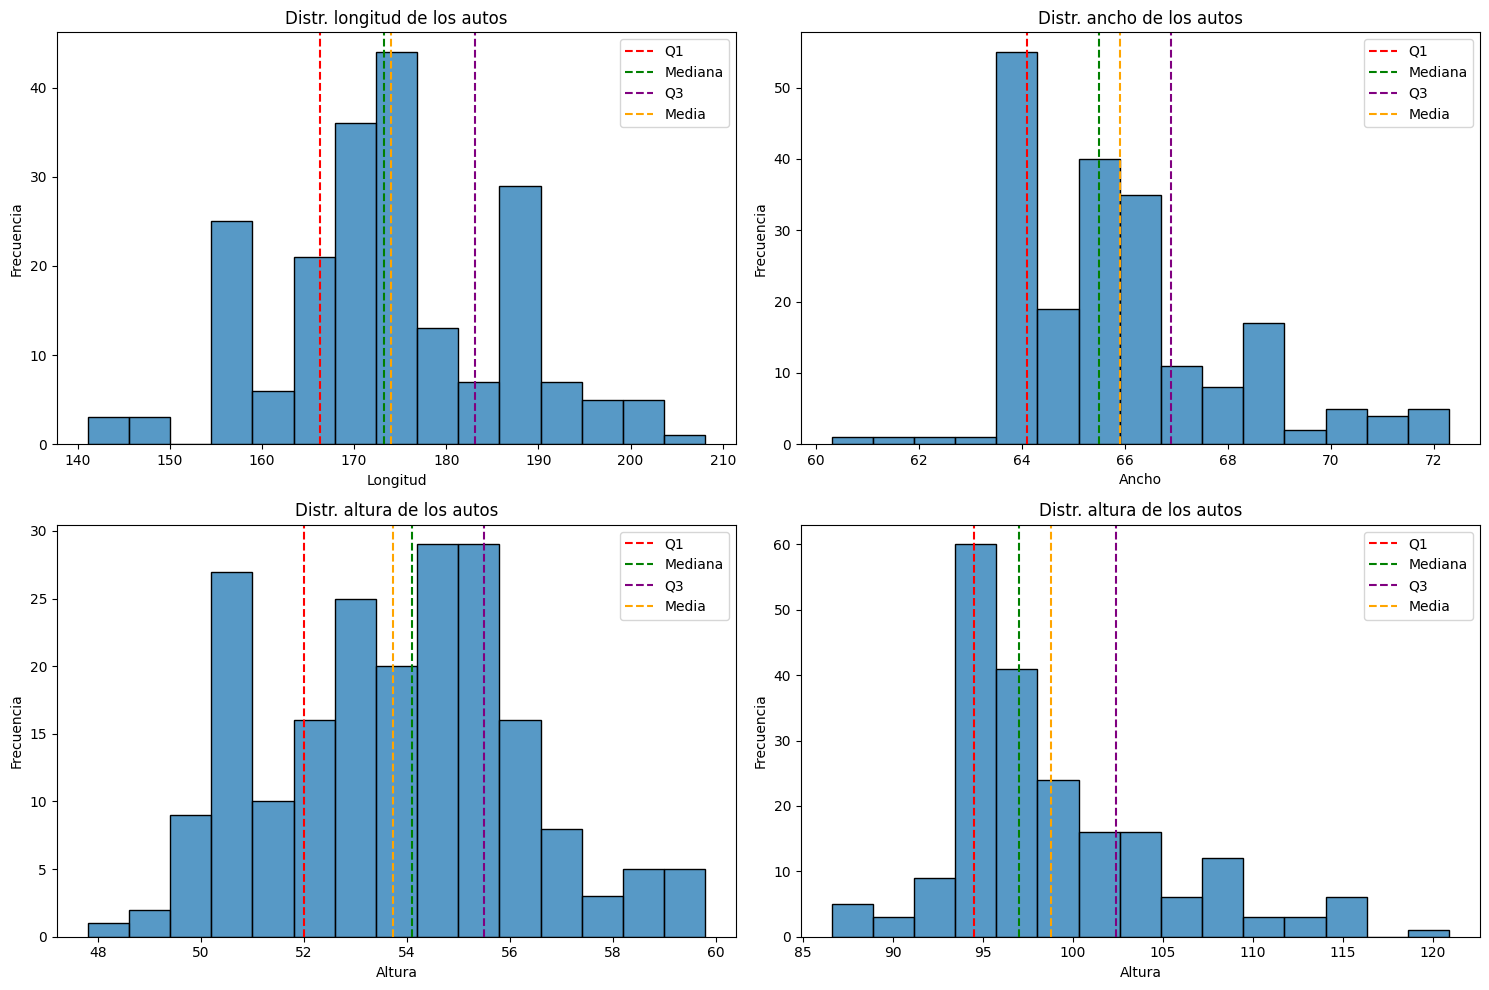

In [287]:
#Graficamos algunas distribuciones relacionadas con las dimensiones de los autos para visualizar la forma en la que se distribuyen (simetría) 
#y comparar con sus respectivos cuantiles.

# Crear un grid de subplots 
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Graficamos en cada subplot
sns.histplot(data=Autos, x='Length', ax=axes[0,0], bins=15)   
axes[0,0].set_title('Distr. longitud de los autos')
axes[0,0].set_xlabel('Longitud')
axes[0,0].set_ylabel('Frecuencia')
#Añadimos los cuantiles al plot
Q1 = Percentiles['Percentiles_Length']['Q1_Length']
Q2 = Percentiles['Percentiles_Length']['Q2_Length']
Q3 = Percentiles['Percentiles_Length']['Q3_Length']
m = np.mean(Autos['Length'])
axes[0,0].axvline(x=Q1, color='red', linestyle='--', label='Q1')
axes[0,0].axvline(x=Q2, color='green', linestyle='--', label='Mediana')
axes[0,0].axvline(x=Q3, color='purple', linestyle='--', label='Q3')
axes[0,0].axvline(x=m, color='orange', linestyle='--',label='Media')
axes[0,0].legend()


sns.histplot(data=Autos, x='Width', ax=axes[0, 1], bins=15)
axes[0, 1].set_title('Distr. ancho de los autos')
axes[0, 1].set_xlabel('Ancho')
axes[0, 1].set_ylabel('Frecuencia')
#Añadimos los cuantiles al plot
Q1 = Percentiles['Percentiles_Width']['Q1_Width']
Q2 = Percentiles['Percentiles_Width']['Q2_Width']
Q3 = Percentiles['Percentiles_Width']['Q3_Width']
m = np.mean(Autos['Width'])
axes[0,1].axvline(x=Q1, color='red', linestyle='--', label='Q1')
axes[0,1].axvline(x=Q2, color='green', linestyle='--', label='Mediana')
axes[0,1].axvline(x=Q3, color='purple', linestyle='--', label='Q3')
axes[0,1].axvline(x=m, color='orange', linestyle='--',label='Media')
axes[0,1].legend()

sns.histplot(data=Autos, x='Height', ax=axes[1, 0], bins=15)
axes[1, 0].set_title('Distr. altura de los autos')
axes[1, 0].set_xlabel('Altura')
axes[1, 0].set_ylabel('Frecuencia')
#Añadimos los cuantiles al plot
Q1 = Percentiles['Percentiles_Height']['Q1_Height']
Q2 = Percentiles['Percentiles_Height']['Q2_Height']
Q3 = Percentiles['Percentiles_Height']['Q3_Height']
m = np.mean(Autos['Height'])
axes[1,0].axvline(x=Q1, color='red', linestyle='--', label='Q1')
axes[1,0].axvline(x=Q2, color='green', linestyle='--', label='Mediana')
axes[1,0].axvline(x=Q3, color='purple', linestyle='--', label='Q3')
axes[1,0].axvline(x=m, color='orange', linestyle='--',label='Media')
axes[1,0].legend()

sns.histplot(data=Autos, x='Wheel_base', ax=axes[1, 1], bins=15)
axes[1, 1].set_title('Distr. altura de los autos')
axes[1, 1].set_xlabel('Altura')
axes[1, 1].set_ylabel('Frecuencia')
#Añadimos los cuantiles al plot
Q1 = Percentiles['Percentiles_Wheel_base']['Q1_Wheel_base']
Q2 = Percentiles['Percentiles_Wheel_base']['Q2_Wheel_base']
Q3 = Percentiles['Percentiles_Wheel_base']['Q3_Wheel_base']
m = np.mean(Autos['Wheel_base'])
axes[1,1].axvline(x=Q1, color='red', linestyle='--', label='Q1')
axes[1,1].axvline(x=Q2, color='green', linestyle='--', label='Mediana')
axes[1,1].axvline(x=Q3, color='purple', linestyle='--', label='Q3')
axes[1,1].axvline(x=m, color='orange', linestyle='--',label='Media')
axes[1,1].legend()
# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar los subplots
plt.show()

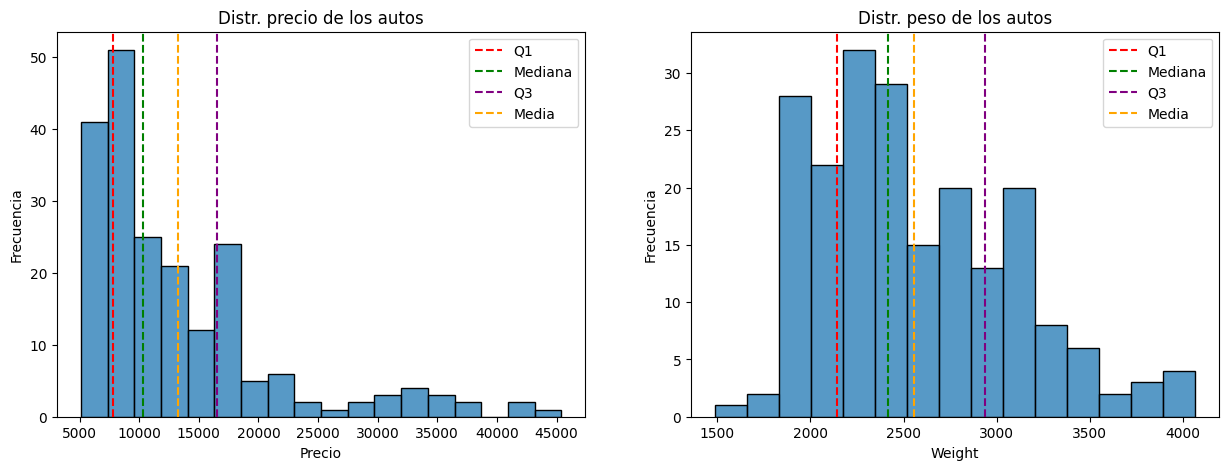

In [251]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.histplot(data=Autos, x='Price', ax=axes[0], bins=18)   
axes[0].set_title('Distr. precio de los autos')
axes[0].set_xlabel('Precio')
axes[0].set_ylabel('Frecuencia')
#Añadimos los cuantiles al plot
Q1 = Percentiles['Percentiles_Price']['Q1_Price']
Q2 = Percentiles['Percentiles_Price']['Q2_Price']
Q3 = Percentiles['Percentiles_Price']['Q3_Price']
m = np.mean(Autos['Price'])
axes[0].axvline(x=Q1, color='red', linestyle='--', label='Q1')
axes[0].axvline(x=Q2, color='green', linestyle='--', label='Mediana')
axes[0].axvline(x=Q3, color='purple', linestyle='--', label='Q3')
axes[0].axvline(x=m, color='orange', linestyle='--',label='Media')
axes[0].legend()

sns.histplot(data=Autos, x='Weight', ax=axes[1], bins=15)   
axes[1].set_title('Distr. peso de los autos')
axes[1].set_xlabel('Weight')
axes[1].set_ylabel('Frecuencia')
#Añadimos los cuantiles al plot
Q1 = Percentiles['Percentiles_Weight']['Q1_Weight']
Q2 = Percentiles['Percentiles_Weight']['Q2_Weight']
Q3 = Percentiles['Percentiles_Weight']['Q3_Weight']
m = np.mean(Autos['Weight'])
axes[1].axvline(x=Q1, color='red', linestyle='--', label='Q1')
axes[1].axvline(x=Q2, color='green', linestyle='--', label='Mediana')
axes[1].axvline(x=Q3, color='purple', linestyle='--', label='Q3')
axes[1].axvline(x=m, color='orange', linestyle='--',label='Media')
axes[1].legend()
#-------------------------------------------------------------------------------------------#

In [252]:
df_summary.head(6)

,Variable,Media,Desvest,Sesgo,Curtosis
0,Price,13276.7106,7969.3435,1.7646,2.9486
1,Wheel_base,98.7566,6.0071,1.0425,0.9633
2,Length,174.0493,12.3072,0.1548,-0.1100
3,Width,65.9078,2.1400,0.8974,0.6566
4,Height,53.7249,2.4376,0.0627,-0.4622
5,Weight,2555.5659,519.4087,0.6764,-0.0709


De los histogramas anteriores la distribución de la longitud de los autos y la distribución de la altura de los autos presentan un comportamiento cercano a ser simétrico debido a que cómo se distribuyen los autos alrededor de su media. Se puede comprobar de igual manera al revisar los valores de sesgo de ambas variables "Length" y "Height". 
Recordemos que una distribución perfectamente simétrica tiene un valor de sesgo de 0 (ningúna de sus colas tiene peso diferente por lo que no hay inclinación bidireccional preferente). 

El valor de curtosis será de ayuda para determinar qué tan normalmente se distribuye una vairiable lo cual se revisará más adelante.

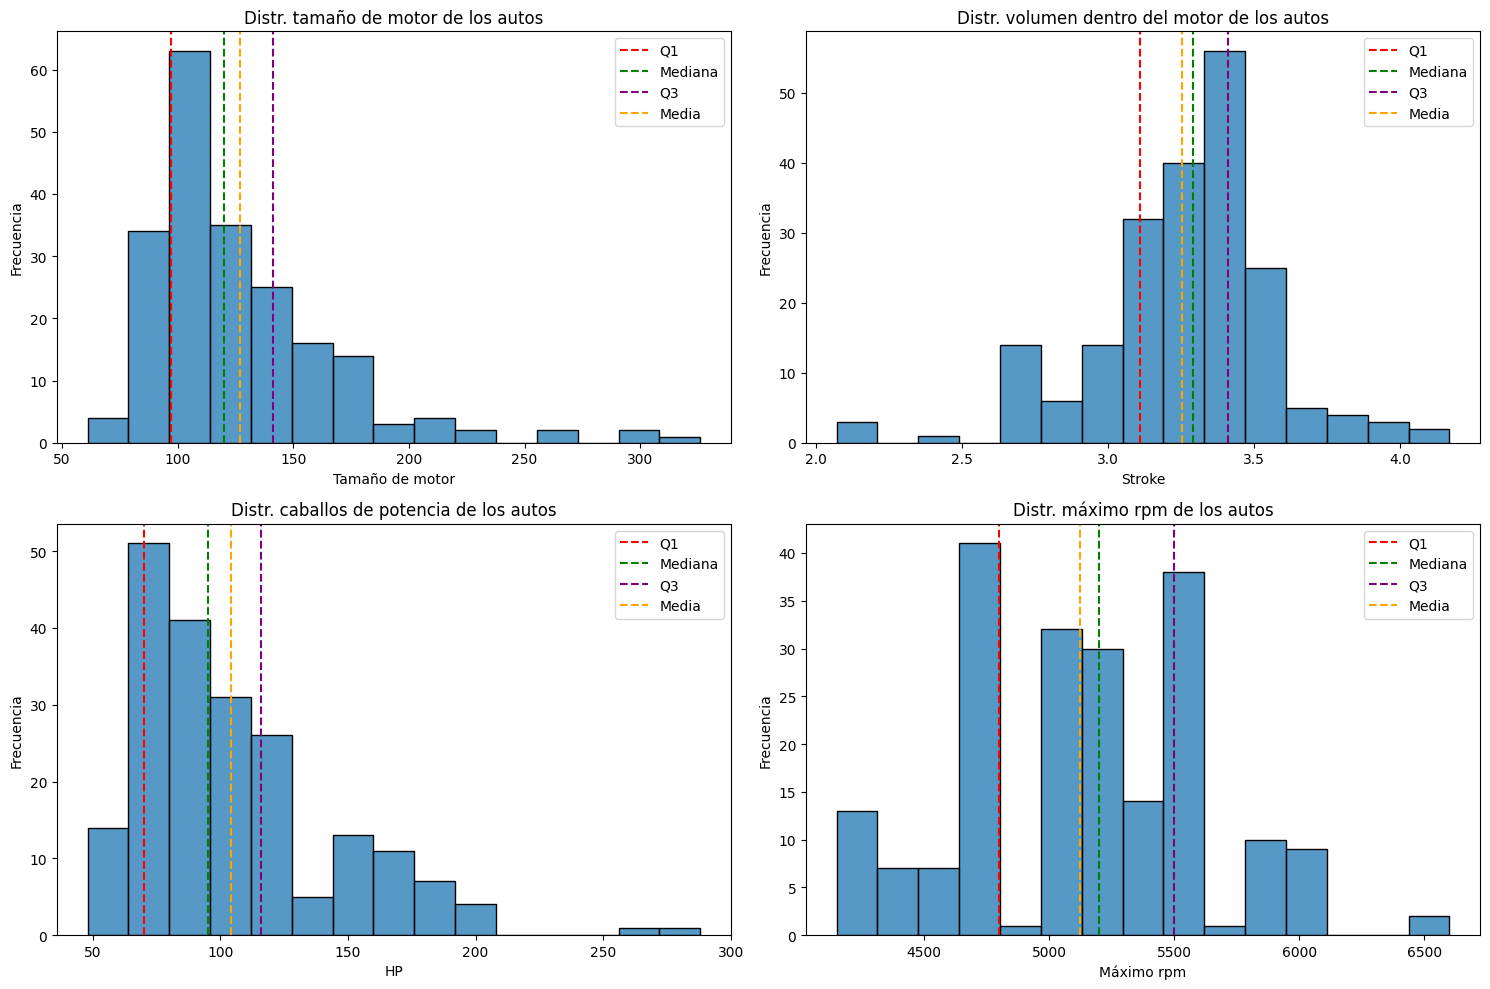

In [253]:
#Graficamos otras distribuciones relacionadas con el funcionamiento interno del auto como campacidad máxima de rpm, potencia del motor (HP) y razón de compresión
#de los autos para visualizar la forma en la que se distribuyen (simetría) 
#y comparar con sus respectivos cuantiles.


# Crear un grid de subplots 
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Graficamos en cada subplot
sns.histplot(data=Autos, x='Engine_size', ax=axes[0,0], bins=15)   
axes[0,0].set_title('Distr. tamaño de motor de los autos')
axes[0,0].set_xlabel('Tamaño de motor')
axes[0,0].set_ylabel('Frecuencia')
#Añadimos los cuantiles al plot
Q1 = Percentiles['Percentiles_Engine_size']['Q1_Engine_size']
Q2 = Percentiles['Percentiles_Engine_size']['Q2_Engine_size']
Q3 = Percentiles['Percentiles_Engine_size']['Q3_Engine_size']
m = np.mean(Autos['Engine_size'])
axes[0,0].axvline(x=Q1, color='red', linestyle='--', label='Q1')
axes[0,0].axvline(x=Q2, color='green', linestyle='--', label='Mediana')
axes[0,0].axvline(x=Q3, color='purple', linestyle='--', label='Q3')
axes[0,0].axvline(x=m, color='orange', linestyle='--',label='Media')
axes[0,0].legend()


sns.histplot(data=Autos, x='Stroke', ax=axes[0, 1], bins=15)
axes[0, 1].set_title('Distr. volumen dentro del motor de los autos')
axes[0, 1].set_xlabel('Stroke')
axes[0, 1].set_ylabel('Frecuencia')
#Añadimos los cuantiles al plot
Q1 = Percentiles['Percentiles_Stroke']['Q1_Stroke']
Q2 = Percentiles['Percentiles_Stroke']['Q2_Stroke']
Q3 = Percentiles['Percentiles_Stroke']['Q3_Stroke']
m = np.mean(Autos['Stroke'])
axes[0,1].axvline(x=Q1, color='red', linestyle='--', label='Q1')
axes[0,1].axvline(x=Q2, color='green', linestyle='--', label='Mediana')
axes[0,1].axvline(x=Q3, color='purple', linestyle='--', label='Q3')
axes[0,1].axvline(x=m, color='orange', linestyle='--',label='Media')
axes[0,1].legend()

sns.histplot(data=Autos, x='Horse_power', ax=axes[1, 0], bins=15)
axes[1, 0].set_title('Distr. caballos de potencia de los autos')
axes[1, 0].set_xlabel('HP')
axes[1, 0].set_ylabel('Frecuencia')
#Añadimos los cuantiles al plot
Q1 = Percentiles['Percentiles_Horse_power']['Q1_Horse_power']
Q2 = Percentiles['Percentiles_Horse_power']['Q2_Horse_power']
Q3 = Percentiles['Percentiles_Horse_power']['Q3_Horse_power']
m = np.mean(Autos['Horse_power'])
axes[1,0].axvline(x=Q1, color='red', linestyle='--', label='Q1')
axes[1,0].axvline(x=Q2, color='green', linestyle='--', label='Mediana')
axes[1,0].axvline(x=Q3, color='purple', linestyle='--', label='Q3')
axes[1,0].axvline(x=m, color='orange', linestyle='--',label='Media')
axes[1,0].legend()

sns.histplot(data=Autos, x='Peak_rpm', ax=axes[1, 1], bins=15)
axes[1, 1].set_title('Distr. máximo rpm de los autos')
axes[1, 1].set_xlabel('Máximo rpm')
axes[1, 1].set_ylabel('Frecuencia')
#Añadimos los cuantiles al plot
Q1 = Percentiles['Percentiles_Peak_rpm']['Q1_Peak_rpm']
Q2 = Percentiles['Percentiles_Peak_rpm']['Q2_Peak_rpm']
Q3 = Percentiles['Percentiles_Peak_rpm']['Q3_Peak_rpm']
m = np.mean(Autos['Peak_rpm'])
axes[1,1].axvline(x=Q1, color='red', linestyle='--', label='Q1')
axes[1,1].axvline(x=Q2, color='green', linestyle='--', label='Mediana')
axes[1,1].axvline(x=Q3, color='purple', linestyle='--', label='Q3')
axes[1,1].axvline(x=m, color='orange', linestyle='--',label='Media')
axes[1,1].legend()
# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar los subplots
plt.show()

In [254]:
df_summary.tail(5)

,Variable,Media,Desvest,Sesgo,Curtosis
6,Engine_size,126.9073,41.5410,1.9334,5.1480
7,Stroke,3.2554,0.3128,-0.6846,2.0926
8,Comp_ratio,10.1425,3.9623,2.5917,5.0772
9,Horse_power,104.1171,39.4476,1.3950,2.5899
10,Peak_rpm,5125.1220,475.8208,0.0746,0.0555


Los histogramas anteriores muestran de manera visual dos posibles variables que parecen tener cierto nivel de simetría: la variable de volumen dentro de los motores y el máximo nivel de rpm que alcanzan los autos. Estas afirmaciones se pueden comprobar revisando el valor de sesgo que tiene ambas variables: 'Stroke' y 'Peak_rpm'.
En este escenario, el volumen dentro de los motores tiene un sesgo negativo de -0.6846 lo cual hace que la distribución se cargue al lado derecho como se muestra en el histograma. En cambio el máximo nivel de rpm presenta el sesgo más cercano a cero de 0.0746 notándose ningúna inclinación preferente en el hisograma.


Comparemos ahora nivel de normalidad en la distribución de las variables:

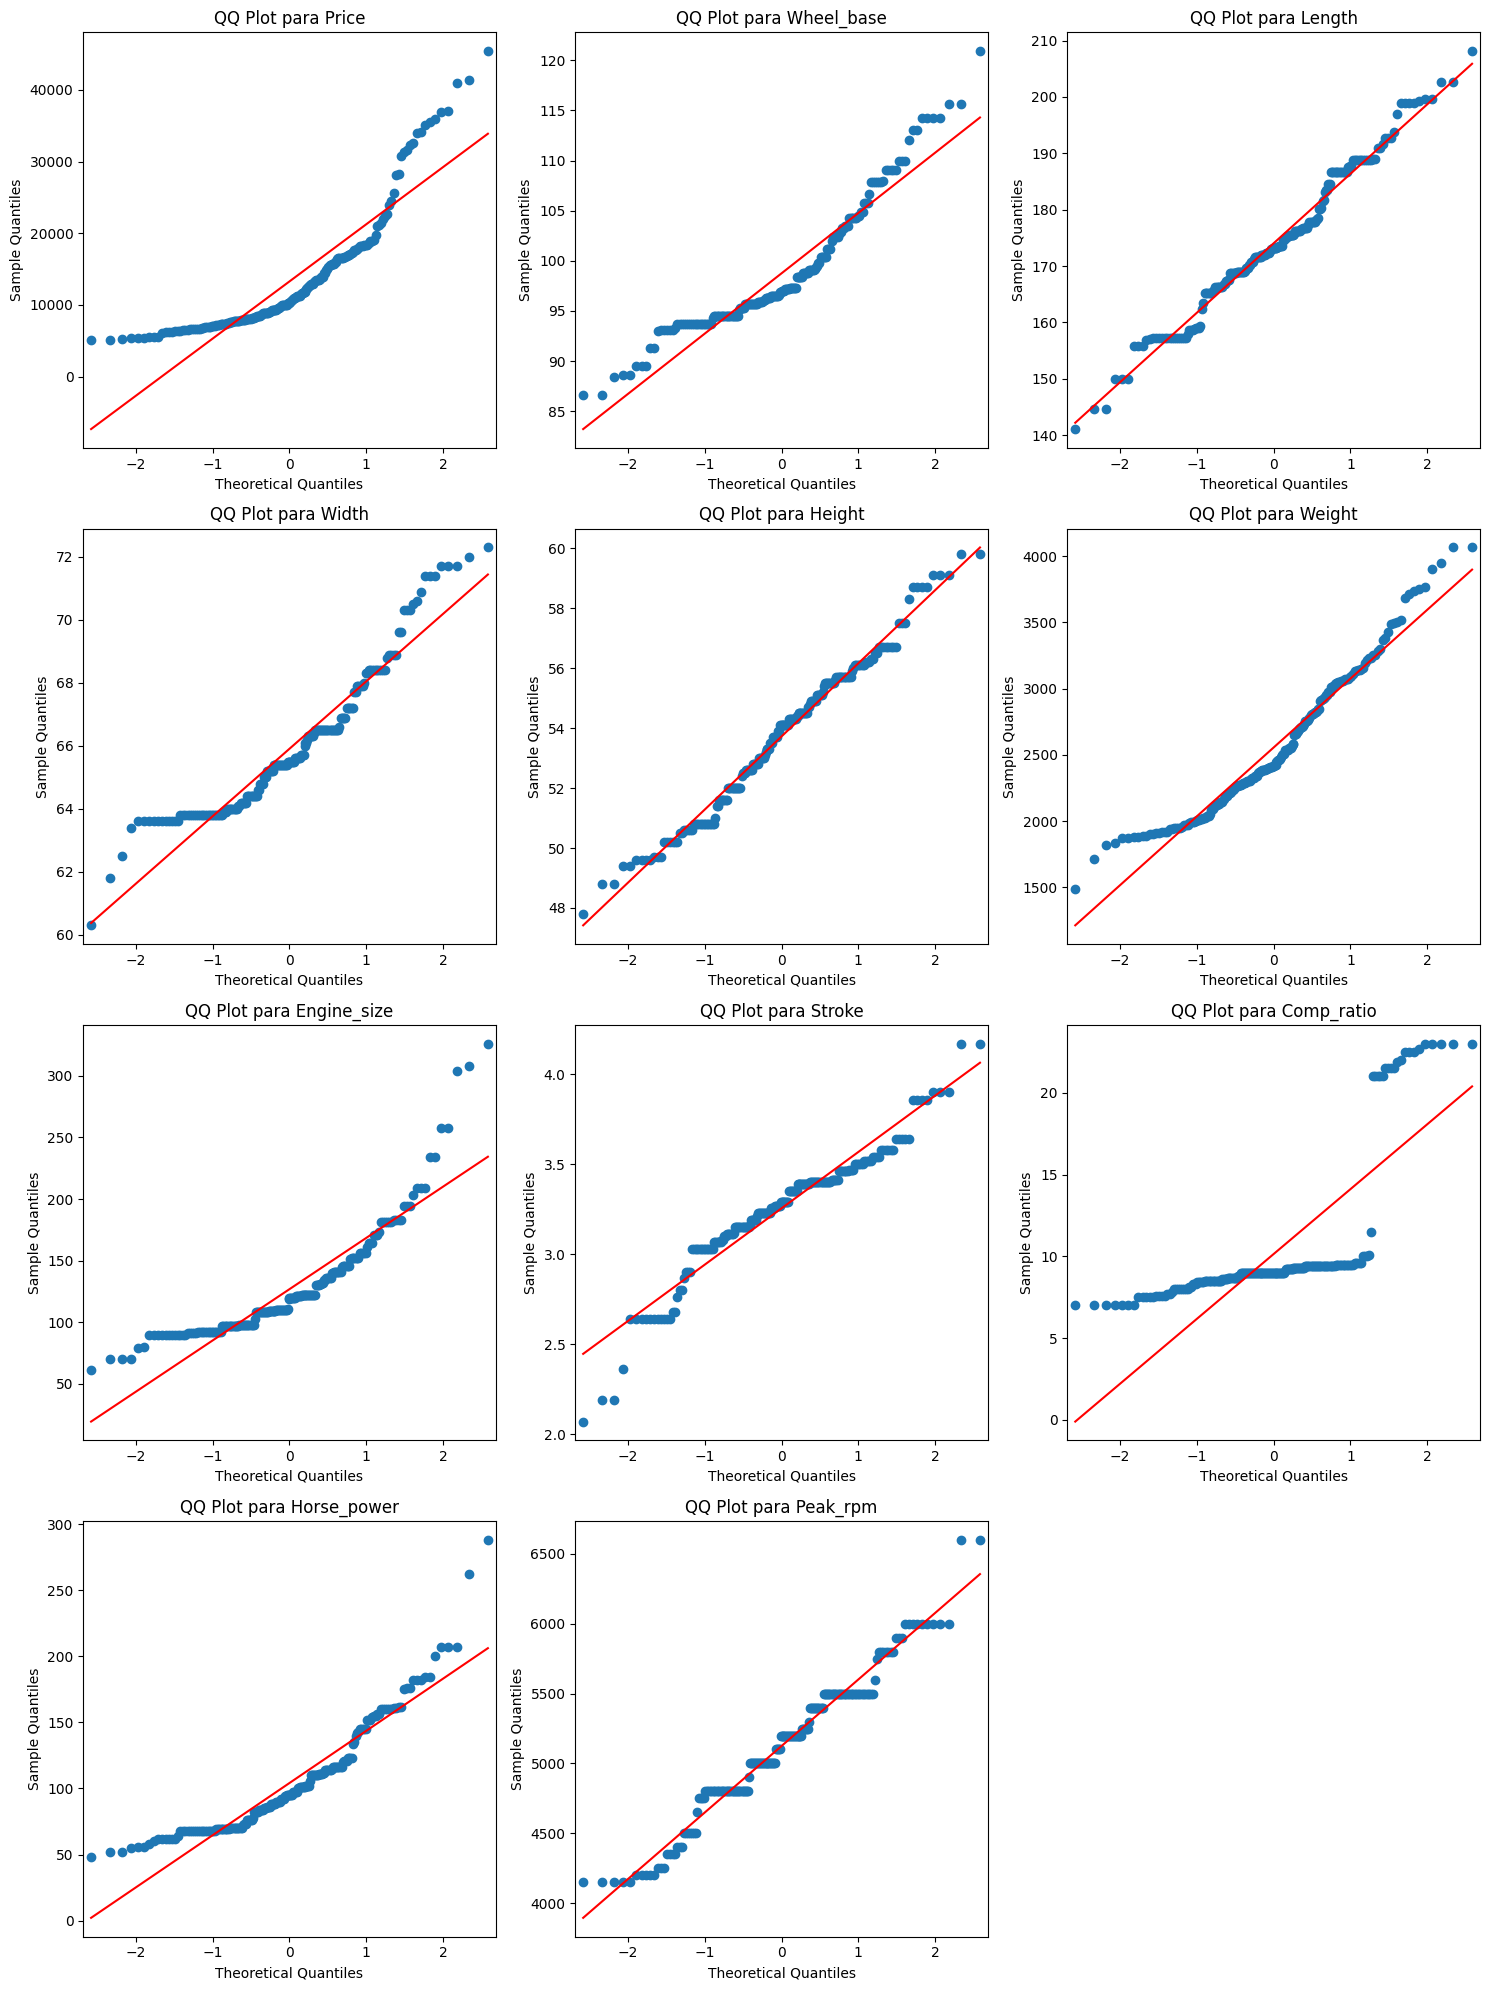

In [255]:
n_vars = len(Var)
rows = 4 

# Crear una figura y subplots
fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(15, 5 * rows))
plt.subplots_adjust(hspace=0.5)  # Espacio vertical entre subplots para ajustar

for i, variable in enumerate(Var):
    row = i // 3
    col = i % 3
    
    # Crear el subplot correspondiente
    ax = axes[row, col]
    
    # Generar el QQ plot
    #stats.probplot(data, dist="norm", plot=ax)
    sm.qqplot(data=Autos[variable], line='s', ax=ax)
    ax.set_title(f'QQ Plot para {variable}')
    
# Ocultar subplots no utilizados en la última fila si es necesario
for i in range(n_vars, rows * 3):
    fig.delaxes(axes.flatten()[i])

# Mostrar los gráficos
plt.tight_layout()
plt.show()

In [256]:
df_summary.head(11)

,Variable,Media,Desvest,Sesgo,Curtosis
0,Price,13276.7106,7969.3435,1.7646,2.9486
1,Wheel_base,98.7566,6.0071,1.0425,0.9633
2,Length,174.0493,12.3072,0.1548,-0.1100
3,Width,65.9078,2.1400,0.8974,0.6566
4,Height,53.7249,2.4376,0.0627,-0.4622
5,Weight,2555.5659,519.4087,0.6764,-0.0709
6,Engine_size,126.9073,41.5410,1.9334,5.1480
7,Stroke,3.2554,0.3128,-0.6846,2.0926
8,Comp_ratio,10.1425,3.9623,2.5917,5.0772
9,Horse_power,104.1171,39.4476,1.3950,2.5899


Lo que se hizo fue graficar el QQplot para diferentes variables con la finalidad de comparar si se distribuyen de forma normal o no. Lo que hace la QQplot es graficar los cuantiles de la distribución real de nuestra variable (eje y) contra los cuantiles de una distribución teórica normal (eje x). La línea diagonal es la línea donde caen los datos que se aproximan a la distribución teórica con la que estamos comparando. 

De lo anterior obtenemos que el QQplot para las variables de longitud (*Length*), altura (*Height*), ancho (*Width*), peso (*Weight*) y máximo nivel de rpm (*Peak_rpm*) presentan un comportamiento muy cercano a una distribución normal. Esto se comprueba revisando su valor de curtosis donde las 5 se aproximan a cero, es decir, se aproximan a ser distribución mesocúrticas.


Ahora calculamos el *coeficiente de correlación* con las variables utilizando el método de Pearson junto con su mapa de calor:

C:\Users\leora\AppData\Local\Temp\ipykernel_18804\4283881495.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = Autos.corr(method='pearson') #Por default usamos el método Pearson pero igual lo podemos poner


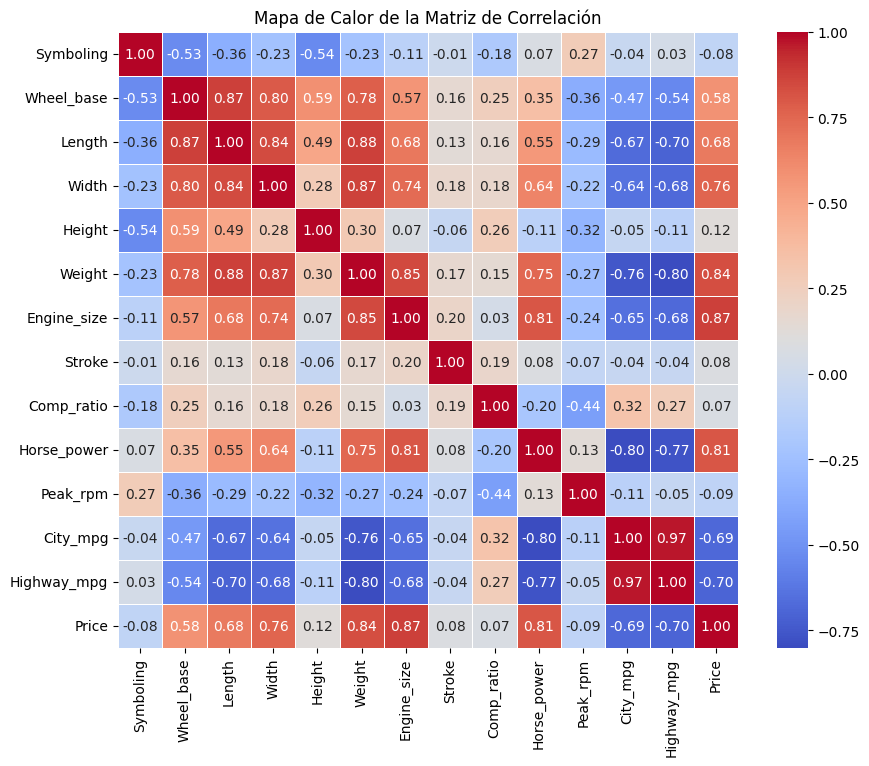

In [289]:
corr = Autos.corr(method='pearson') #Por default usamos el método Pearson pero igual lo podemos poner
plt.figure(figsize=(10, 8))  # Ajusta el tamaño del gráfico
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Mapa de Calor de la Matriz de Correlación")
plt.show()

In [257]:

corr = Autos.corr(method='pearson') #Por default usamos el método Pearson pero igual lo podemos poner
df_Price_corr = pd.DataFrame(corr.iloc[:,-1])
df_Price_corr


C:\Users\leora\AppData\Local\Temp\ipykernel_18804\4103208297.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = Autos.corr(method='pearson') #Por default usamos el método Pearson pero igual lo podemos poner


,Price
Symboling,-0.079978
Wheel_base,0.577816
Length,0.682920
Width,0.759325
Height,0.119336
Weight,0.835305
Engine_size,0.874145
Stroke,0.079443
Comp_ratio,0.067984
Horse_power,0.808139


De la matriz de correlación podemos obtener auquellas variables que presentan un coeficiente positivo cercano a 1. Esto indica que existe una relación lineal entre estas variables.


Ahora hacemos diagramas de dispersión para notar visualmente la colinealidad con el precio: 

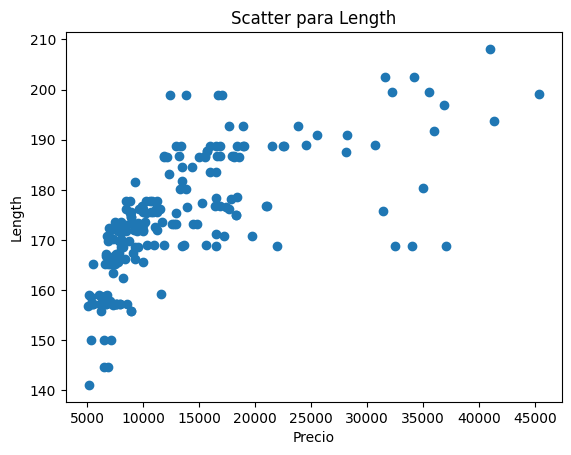

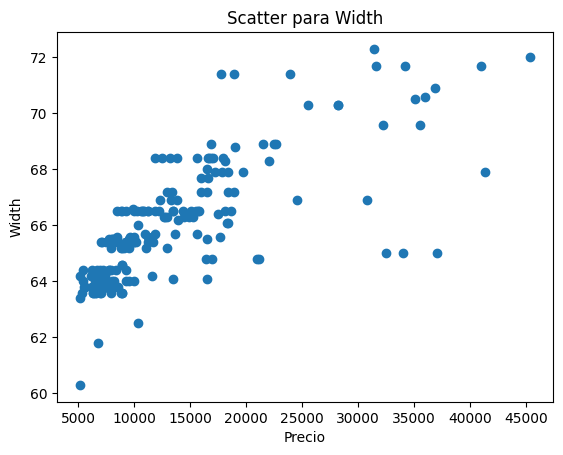

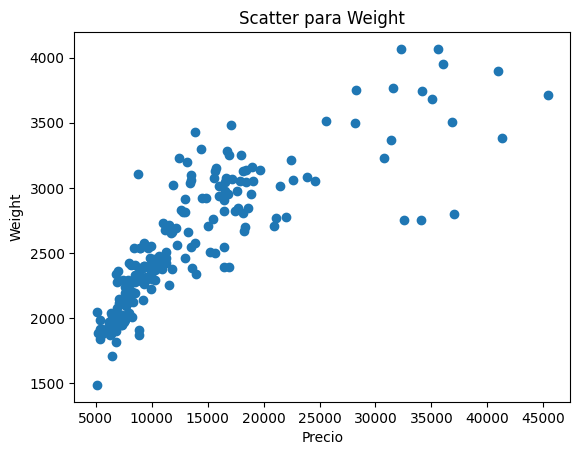

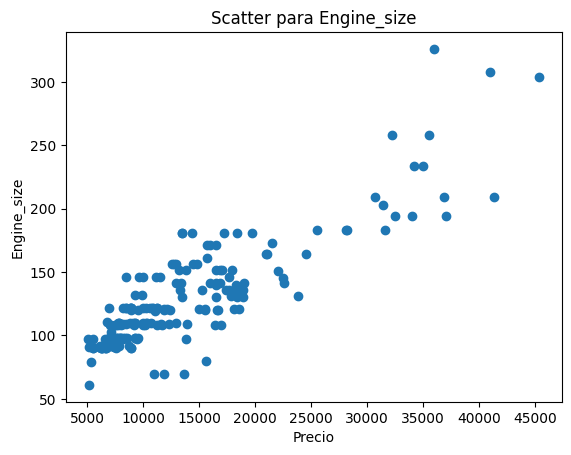

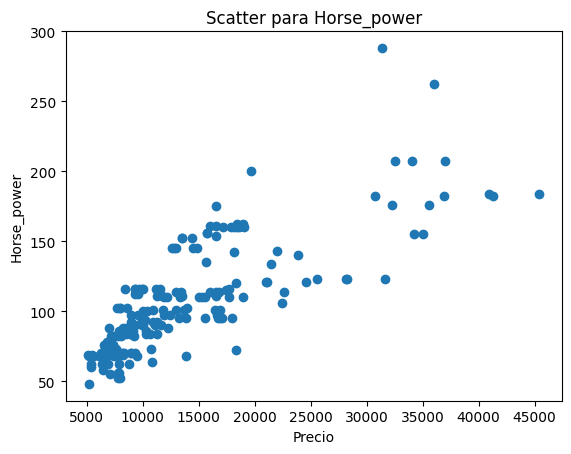

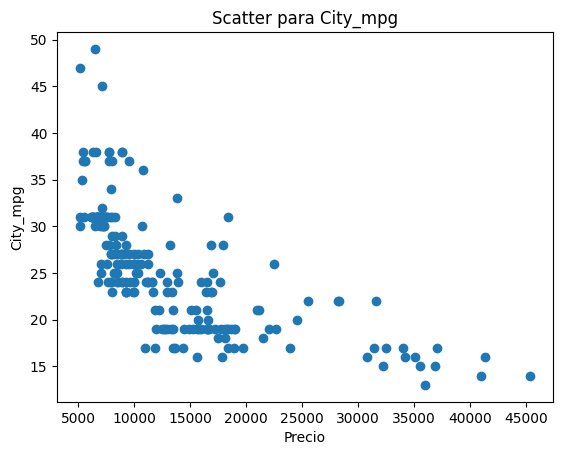

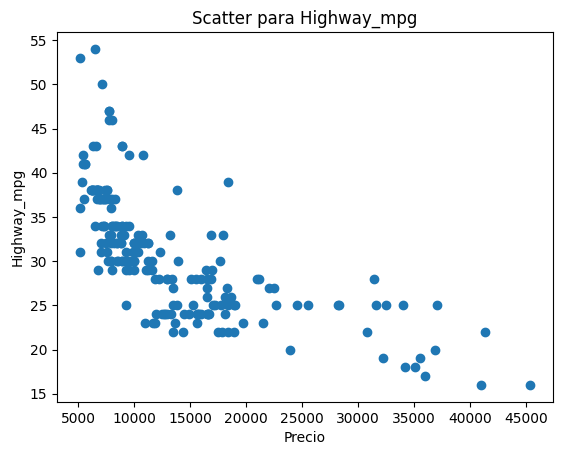

In [258]:
Var1 = ['Length', 'Width', 'Weight', 'Engine_size', 'Horse_power', 'City_mpg', 'Highway_mpg'] #Tomamos las variables que más coeficiente de correlación
#tienen. Las últimas tienen un coeficiente negativo pero próximo a 1.

for i in Var1:
    plt.scatter(x=Autos['Price'], y=Autos[i], marker='o')
    plt.title(f'Scatter para {i}')
    plt.xlabel('Precio')
    plt.ylabel(i)
    plt.show()
    
#Checar la manera de poner estos scatter en un subplot (el código que usamos no nos sirvio)

## 2.0 Análisis de variables cualitativas
Hacemos algunas gráficas de barras

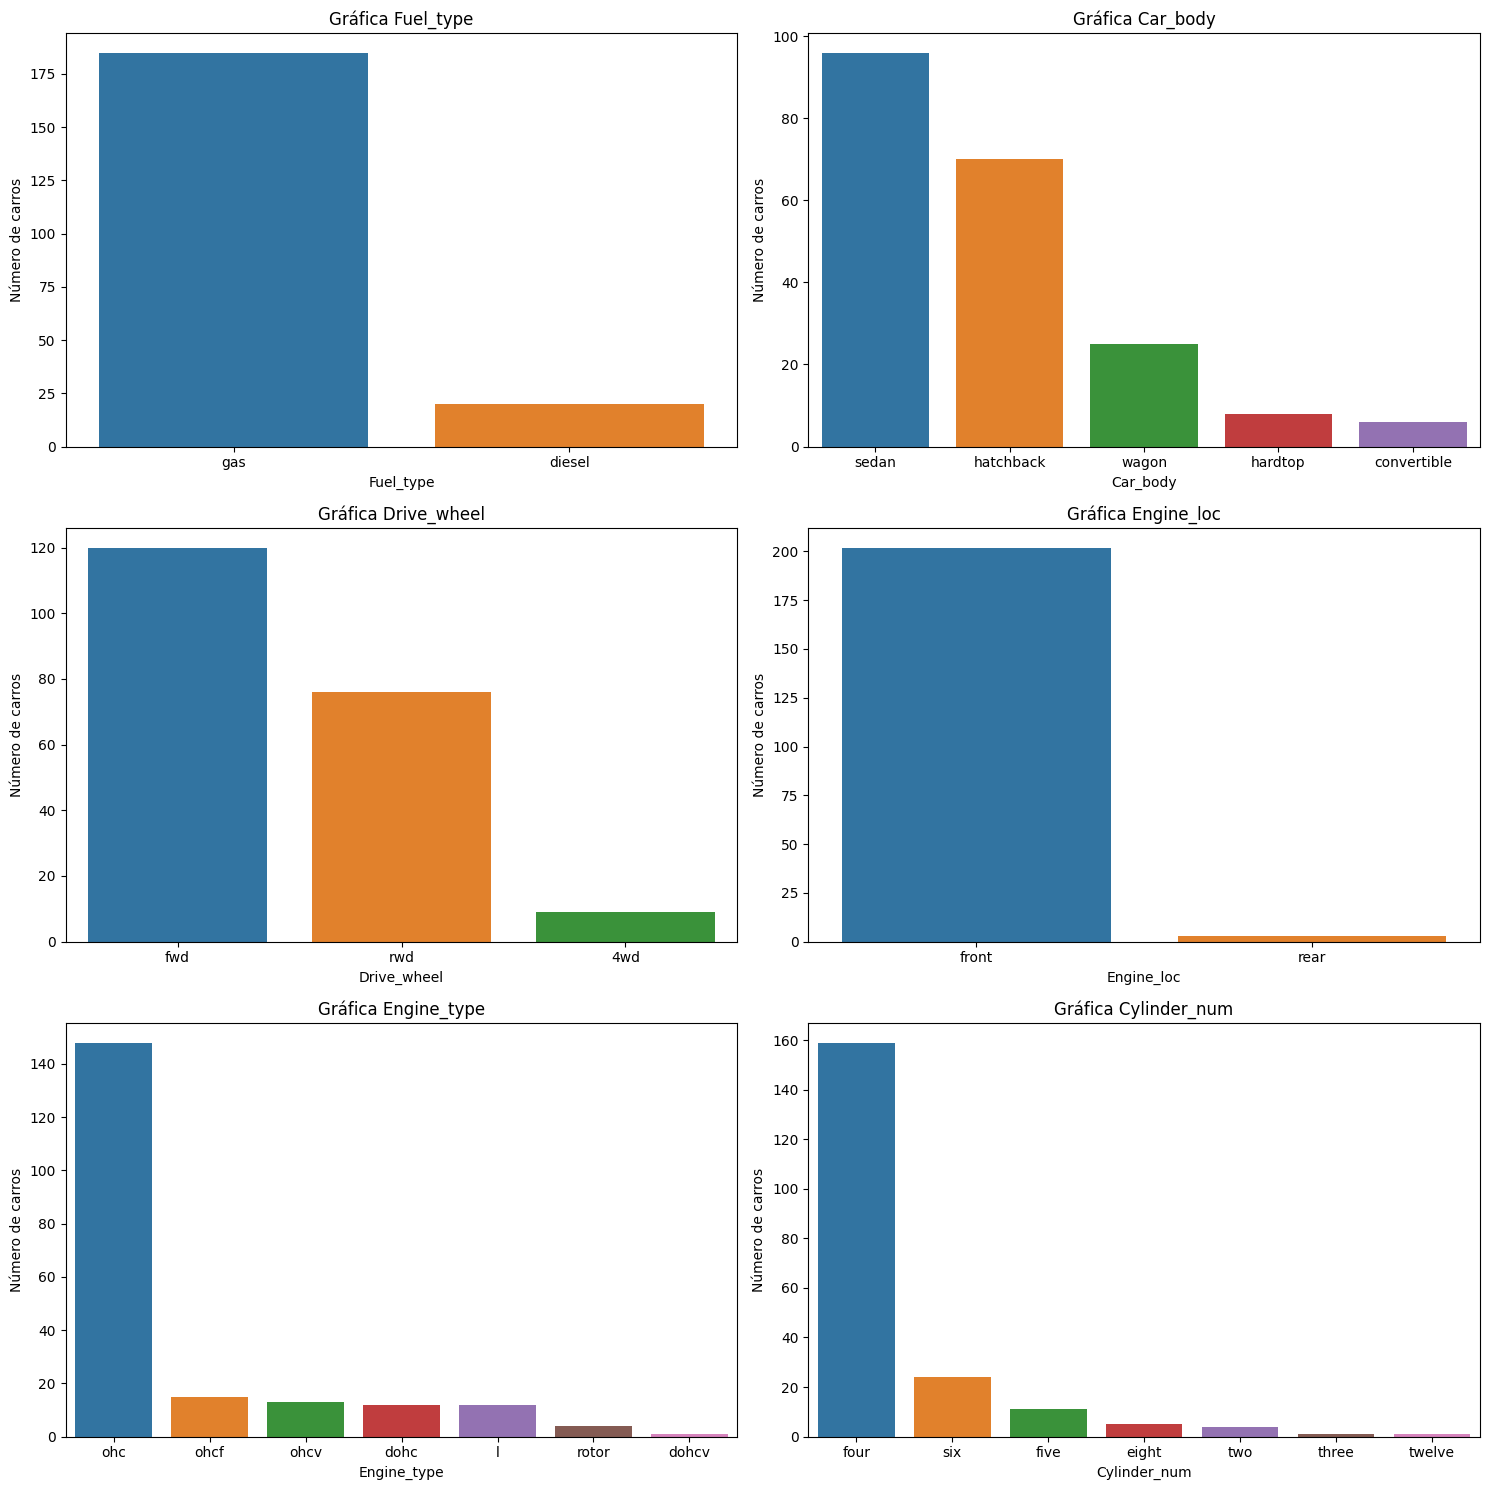

In [259]:

Var_C = ['Fuel_type', 'Car_body', 'Drive_wheel', 'Engine_loc', 'Engine_type', 'Cylinder_num']
n_vars = len(Var_C)
rows = 3

# Crear una figura y subplots
fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(15, 5 * rows))
plt.subplots_adjust(hspace=0.5)  # Espacio vertical entre subplots para ajustar

for i, variable in enumerate(Var_C):
    row = i // 2
    col = i % 2
    
    # Crear el subplot correspondiente
    ax = axes[row, col]
    
    Count = Autos[variable].value_counts()
    sns.barplot(x=Count.index, y=Count.values, ax=ax)  # Usar ax=ax aquí
    ax.set_title(f'Gráfica {variable}')
    ax.set_xlabel(variable)
    ax.set_ylabel('Número de carros')
    
# Ocultar subplots no utilizados en la última fila si es necesario
for i in range(n_vars, rows * 2):
    fig.delaxes(axes.flatten()[i])

# Mostrar los gráficos
plt.tight_layout()
plt.show()


Veamos algunas gráficas de caja y bigote entre la variable precio (numérica) y algunas otras variables con tal de idenficar ciertos patrones entre las dos variables graficadas. Algunos de los patrones e información estadística que podemos rescatar a partir de éstos gráficos son:
- Mediana (Percentil 50) de cada caja
- Cuartiles (Q1 y Q3): Obtenemos el rango intercuartílico con Q3-Q1 que da información sobre la dispersión y variabilidad de los datos
- Valores atípicos: Podemos identificar valores atípicos que se encuentran fuera del rango de los bigotes de cada caja
- Simetría: La forma y orientación de la caja en relación con la mediana puede indicar el grado de simetría de los datos
- Distribución: La longitud de los bigotes puede proporcionar información sobre la concetración de los datos 

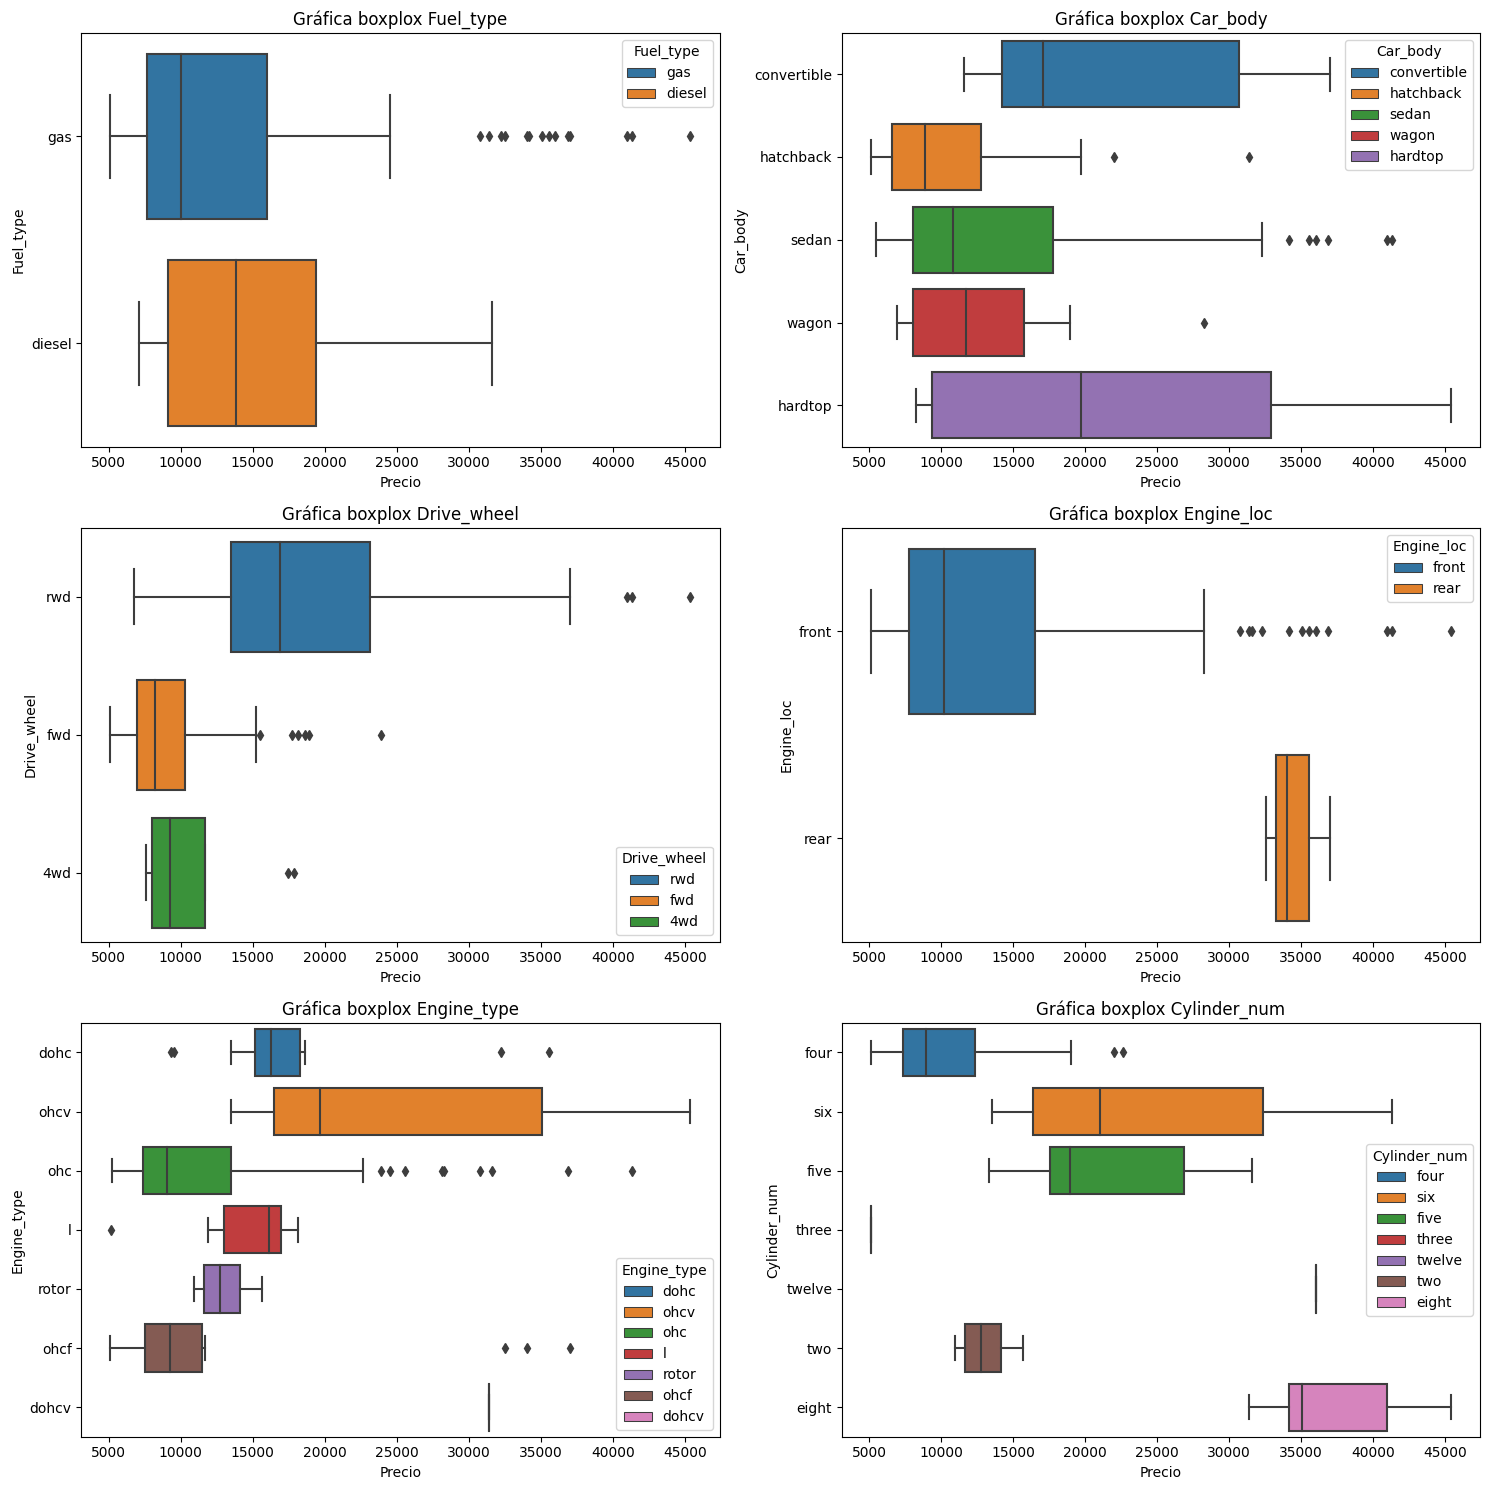

In [260]:
fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(15, 5 * rows))
plt.subplots_adjust(hspace=0.5)  # Espacio vertical entre subplots para ajustar

for i, variable in enumerate(Var_C):
    row = i // 2
    col = i % 2
    
    # Crear el subplot correspondiente
    ax = axes[row, col]
    
    sns.boxplot(data=Autos, x='Price', y=variable, hue=variable, dodge=False, ax=ax)
    ax.set_title(f'Gráfica boxplox {variable}')
    ax.set_xlabel('Precio')
    ax.set_ylabel(variable)
    
# Ocultar subplots no utilizados en la última fila si es necesario
for i in range(n_vars, rows * 2):
    fig.delaxes(axes.flatten()[i])

# Mostrar los gráficos
plt.tight_layout()
plt.show()

De los boxplot anteriores es posible rescatar información relevante sobre la dispersión de los datos y los datos atípicos que caen fuera de los bigotes. 

Un IQR alto podría sugerir que hay una variabilidad significativa en los precios dentro de esa categoría en particular. Podría indicar que hay diferentes factores o subgrupos dentro de esa categoría que tienen precios notablemente diferentes. También podría sugerir la presencia de valores atípicos que están contribuyendo a la amplia dispersión.

## Variables seleccionadas

Las variables seleccionadas que más relación estadística podrían tener con la variable del precio del auto serían:
- Longitud (*Length*)
- Peso (*Weight*)
- Tamaño del motor (*Engine size*)
- Ancho (*Width*)
- Tipo de carrocería (*Car Body*)
- Tipo de combustible (*Fuel Type*)

Sobre las variables numéricas elegidas:
La variable *Length* presenta un comportamiento estadístico casi perfecto pues además de presentar una simetría notable gracias a la distribución en su histograma y el valor tan bajo de sesgo, ésta también cuenta con un comportamiento de normalidad muy cercano a lo teórico lo cual se comprueba por el valor numérico de su curtosis y su comportamiento en la gráfica QQplot. Además ésta presenta una correlación de $0.68$.

La variable *Weight* a pesar de presentar una distribución asimétrica con sesgo considerable de $0.6$, ésta variable cuenta con una curtosis muy baja lo que se traduce a un comportamiento cercano a una distribución normal teórica (lo cual también se ve comprobado con la gráfica QQplot). Además, presenta un coeficiente de correlación muy alto de $0.83$.

La variable *Width* tiene una correlación alta con el precio de $0.75$ y a pesar de que no presenta un comportamiento de normalidad bueno, podría ser un buen candidato para lograr hacer análisis posteriores.

La variable *Engine_size* está directamente relacionada con el tamaño del motor (*Horse Power* que resulta ser otra variable) donde dicha relación se hace evidente en la matriz de correlación pues el valor del coeficiente entre *Horse Power* y *Engine Size* es de aproximadamente 0.8. Finalmente se decidió por utilizar la variable de *Engine Size* pues al presentar una alta correlación de $0.87$, ésta tiene un mejor comportamiento de normalidad en las gráficas QQplot. Además, haciendo un poco de investigación se llegó a la conclusión de que el número de cilindros impacta en el tamaño del motor de un auto, lo que también se traduce en la potencia que será capaz de entregar el coche, por lo que la vuelve en una buena variable para predecir $Y$ y para realizar los siguientes análisis.

Además del valor numérico del coeiciente de correlación de las variables numéricas anteriormente mencionadas, también es posible ver un comportamiento cercano a una relación lineal en los gráficos de dispersión donde se graficó cada variable contra *Price*. 

Sobre las variables categírcas elegidas:
La variable *Car Body* es una buena variable a considerar pues en el gráfico boxplot los tres tipos de carrocería centrales presentan una buena dispersión (rango intercuartílico IQR similar) además de que la media de cada conjunto es similar entre las tres. También, no se presentan datos atípicos. 
(Las dos variables de Convertible y Hardrop no se tomarán en cuenta para los siguientes análisis pues de la gráfica de barras sabemos que no hay muchos coches dentro de estas categorías y presentan una dispérsión muy alta. Para fines de mantener una distribución equilibrada se decidirá no incluirlos en la aplicación de los modelos matemáticos)
La variable *Car Body* cae en la misma decripción que la anterior. 

Para hacer el ANOVA ocupamos que la variable de predicción (label), es decir, la variable dependiente sea numérica (Precio por ejemplo) y las demás variables independientes (features) sean categóricas (tipo de carrocería, compañía que fabrica el auto, tipo de combustible, etc)

ANOVA de un factor (One-Way ANOVA): Se utiliza cuando se compara la media de una variable continua en diferentes grupos.

ANOVA de dos factores (Two-Way ANOVA): Se utiliza cuando se compara la media de una variable continua en diferentes grupos, teniendo en cuenta dos factores categóricos. ¿De dónde obtenemos nuevos factores?

ANOVA de medidas repetidas (Repeated Measures ANOVA): Se utiliza cuando se comparan las medias de un grupo de sujetos en diferentes momentos o condiciones.


Comparar con el tipo de carrocería por ejemplo me ayudaría a comprobar estadísticamente que la variable categórica está influenciada en el precio del auto. Además proprcionaría información sobre qué tipo de fuselaje es que el que difiere de los demás (Recuerda que se supone como cierto que las medias de los precios son iguales para cada grupo de carrocería) al lograr negar esta hipótesis, tendríamso evidencia estadística lo suficientemente significativa para afirmar que hay grupos cuya media de precio difieren mucho.



Para estimar miu utilizar la distribución t independientemente el valor de n.
Para pruebas de hipótesis



## Cosas por hacer para la siguiente entrega:

- Obtener valores de p para comparar los coeficiente de correlación 
- En la regresión lineal la función de hiótesis: $Y = \beta + \beta_1X + \epsilon$ los dos primeros términos son fijos y el único que es variable es el error $\epsilon$ por lo que es útil aplicar pruebas de normalidad sólo a esta cantidad. 
- Hay coeficiente de determinación ajustado y no ajustado (Ls paqueterías ya lo sacan con un comando)

# Aplicación de técnicas de análisis matemático
## - Análisis ANOVA
### Variables categóricas

Debido a que ya se realizó un análisis ANOVA para la variable **Car_body** y **Drive_Wheel**, no se obtuvo normalidad en los residuos ni mucho menos homocedasticidad. Por ello, se opta por aplicar la técnica de normalización BoxCox a la variable dependiente (target) **Precio**. 

Lo anterior se justifica debido al supuesto del modelo ANOVA que estamos implementando. Este modelo $Y = \mu_{0} +\tau_{1}X_{1}+\tau_{2}X_{2}+\tau_{3}X_{3}...+\epsilon$ se basa bajo la suposición de que todos los términos con variables independientes $X$ (con su respectivo peso/influencia sobre la variable $Y$) son fijos, inalterables. Las partes sobrantes de cada variable independiente $X$ que no esté incluida en la predicción de $Y$ se acumula en el error $\epsilon$. Por ello, al asegurar que $Y$ se distribuya normalmente, también aseguramos que $\epsilon$ lo haga.

In [261]:
#Librerías adicionales para la aplicación de modelos estadísticos
import pingouin as pg
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols


In [262]:
#Verificamos con la prueba de normalidad de Anderson-Darling
#Hacemos uso de la paquetería Scipy.stats
p_value = stats.anderson(Autos['Price'], dist='norm', )
p_value

AndersonResult(statistic=12.340562863167577, critical_values=array([0.565, 0.644, 0.772, 0.901, 1.072]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

La prueba de Anderson-Darling arroja el estadístico de Anderson con sus respectivos valores críticos para cada nivel de significacia en porcentajes. Si el estadístico es mayor que los valores críticos, entonces para ese nivel de significancia los datos no se distribuyen como la función de distribución elegida. Con esto confirmamos que en efecto la variable de Precio no se distribuye como una normal.

El valor de lambda que maximiza la log-verosimilitud máxima es: -0.6280809555716815


C:\Users\leora\AppData\Local\Temp\ipykernel_18804\2097828279.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Anova1['Price_transf'] = transformed_price


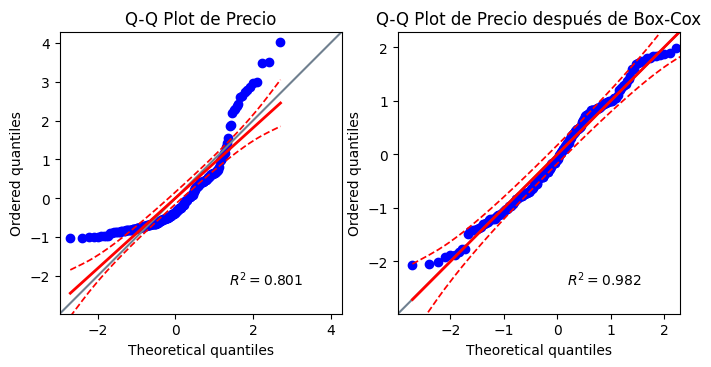

AndersonResult(statistic=1.239188771027301, critical_values=array([0.565, 0.644, 0.772, 0.901, 1.072]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [263]:
#Aplicamos la técnica BoxCox a Precio y comparamos su QQplot antes de la tranformación
#Hacemos uso de la paquetería Scipy.stats
transformed_price, lambda_best_fit = stats.boxcox(Autos['Price'])
print('El valor de lambda que maximiza la log-verosimilitud máxima es: {}'.format(lambda_best_fit))

#------------------------------------------------------------------------------------------------#
#Anova1 será la variable para utilizar en el primer anova con las variables categóricas. Creamos el nuevo subset
Anova1 = Autos[['Price','Car_body','Fuel_type', 'Drive_wheel']]
Anova1['Price_transf'] = transformed_price
#------------------------------------------------------------------------------------------------#

fig, axs = plt.subplots(1, 2, figsize=(8, 7))
pg.qqplot(Autos['Price'], dist='norm', ax=axs[0])
axs[0].set_title("Q-Q Plot de Precio")
pg.qqplot(transformed_price, dist='norm', ax=axs[1])
axs[1].set_title("Q-Q Plot de Precio después de Box-Cox")
plt.show()


# Prueba de normalidad Shapiro-Wilk después de la transformación de Box-Cox
p_value_tra = stats.anderson(transformed_price, dist='norm', )
p_value_tra


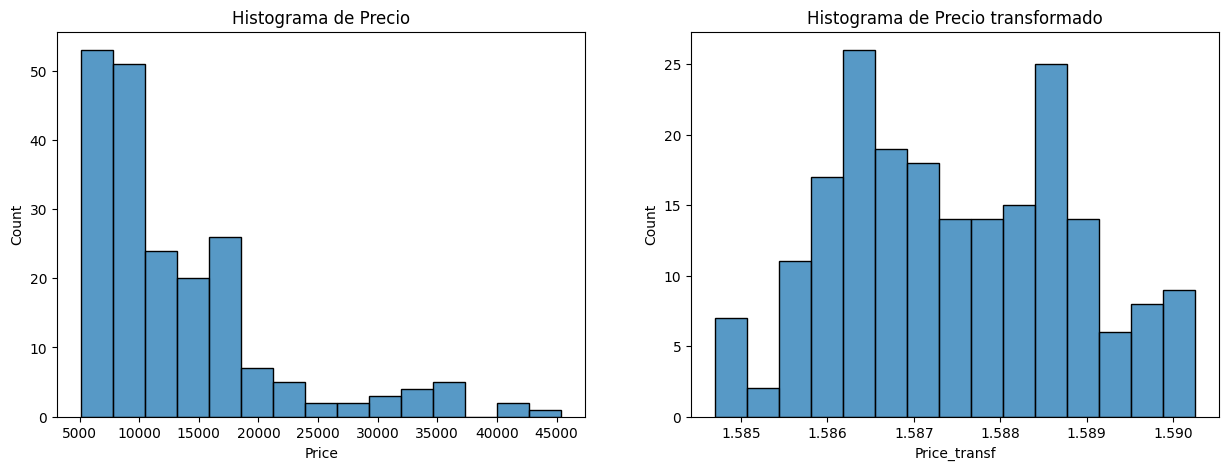

In [264]:
#Veamos la forma de la fistribución de la variable
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(data=Anova1, x='Price', ax=axs[0], bins=15)
axs[0].set_title("Histograma de Precio")
sns.histplot(data=Anova1, x='Price_transf', ax=axs[1], bins=15)
axs[1].set_title("Histograma de Precio transformado")
plt.show()

Del gráfico QQplot se observa que ahora la distribución de Precio es muy similar a una normal, al igual que en el histograma. Aplicando la prueba de Anderson-Darling obtenemos que el estadístico es muy cercano al penúltimo y último valor crítico correspondiente a un nivel de significancia de $\alpha = 0.025$ (2.5%) y  $\alpha = 0.01$ (1%) respectivamente, por lo que para estos niveles de significancia la variable **Price** se aproxima distribuirse como una normal.
Entonces la tranformación para $Y$ quedaría según lo indica la transformación de potencia BoxCox:
\begin{equation}
f(x,\lambda)= \left\{ \begin{array}{lcc} \frac{x^\lambda-1}{\lambda} & si & \lambda\neq0 \\ \\ log(x) & si & \lambda=0  \end{array} \right.
\end{equation}

De la ecuación 1 obtenemos que la tranformación realiazada a $Y$ es: 
\begin{equation}
\frac{y^{-0.628}-1}{-0.628}
\end{equation}

Realizaremos un análisis ANOVA a las variables de tipo de carrocería para ver si estadísticamente hay una diferencia entre las medias del precio de los autos según el tipo de carrocería utilizada. Pero antes, eliminaremos los grupos de carrocería "Hardtop" y "Convertible" pues la distribución que se aprecia en la gráfica de barras es muy desigual, además en el boxplot se observa que ambos grupos también presentan una alta dispersión en comparación con los demás. Por ello se procede a quitar los datos de estos dos grupos.

### Construcción de hipótesis:
$H_0 = \mu_{\text{sedan}}=\mu_{\text{hatchback}}=\mu_{\text{wagon}}$

$H_1 = \text{Al menos un grupo tiene una media de precio diferente a las demás}$

In [265]:
#Anova1 será la variable para utilizar en el primer anova con las variables categóricas. Creamos el nuevo subset
#Anova1 = Autos[['Price','Car_body','Fuel_type', 'Drive_wheel']]
c = Anova1[(Anova1['Car_body']=='convertible') | (Anova1['Car_body']=='hardtop')].index  # Índices a eliminar del dataframe
Anova1 = Anova1.drop(c)
print('Se quitaron {} datos del data frame'.format(len(Autos)-len(Anova1)))

Se quitaron 14 datos del data frame


In [266]:
modelo_anova = ols('Price_transf ~ C(Car_body)', data=Anova1).fit()
resultado_anova = sm.stats.anova_lm(modelo_anova, typ=1)
print(resultado_anova)

                df    sum_sq   mean_sq         F    PR(>F)
C(Car_body)    2.0  0.000025  0.000012  7.762206  0.000577
Residual     188.0  0.000301  0.000002       NaN       NaN


In [267]:
tukey_result1 = pairwise_tukeyhsd(Anova1['Price_transf'], Anova1['Car_body'])
print(tukey_result1)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
  group1  group2 meandiff p-adj   lower  upper  reject
------------------------------------------------------
hatchback  sedan   0.0008 0.0004  0.0003 0.0012   True
hatchback  wagon   0.0006 0.0816 -0.0001 0.0013  False
    sedan  wagon  -0.0001 0.8822 -0.0008 0.0005  False
------------------------------------------------------


Es importante mencionar que la base de datos desde un principio no estuvo equilibrada (al menos respecto a la variable Car_Body), por lo que este análisis únicamente se centra en los datos recopildos en la encuesta. Salieron Convertible, hardtop se quitaron por desbalancear mucho la distribución de datos y wagon no presentó significancia con ningún otro tipo de carrocería (esto puede ser porque hubo muy pocas instancias de wagon en comparación con hatchback y sedan)

In [268]:
c = Anova1[(Anova1['Car_body']=='wagon')].index  # Índices a eliminar del dataframe
Anova1_1 = Anova1.drop(c)
print('Se quitaron {} datos del data frame'.format(len(Anova1)-len(Anova1_1)))

Se quitaron 25 datos del data frame


In [288]:
modelo_anova = ols('Price_transf ~ C(Fuel_type)', data=Anova1_1).fit()
resultado_anova = sm.stats.anova_lm(modelo_anova, typ=1)
print(resultado_anova)

                 df    sum_sq   mean_sq        F    PR(>F)
C(Fuel_type)    1.0  0.000003  0.000003  1.88617  0.171509
Residual      164.0  0.000296  0.000002      NaN       NaN


In [290]:
tukey_result1 = pairwise_tukeyhsd(Anova1['Price_transf'], Anova1['Fuel_type'])
print(tukey_result1)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper reject
--------------------------------------------------
diesel    gas  -0.0006 0.0444 -0.0013  -0.0   True
--------------------------------------------------


Hacemos el análisis ANOVA sin los registros de wagon:

In [269]:
modelo_anova = ols('Price_transf ~ C(Drive_wheel)', data=Anova1_1).fit()
resultado_anova = sm.stats.anova_lm(modelo_anova, typ=1)
print(resultado_anova)

                   df    sum_sq   mean_sq          F        PR(>F)
C(Drive_wheel)    2.0  0.000135  0.000068  67.274421  4.992191e-22
Residual        163.0  0.000164  0.000001        NaN           NaN


In [270]:
tukey_result2 = pairwise_tukeyhsd(Anova1_1['Price_transf'], Anova1_1['Drive_wheel'])
print(tukey_result2)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   4wd    fwd   -0.001 0.0821 -0.0021 0.0001  False
   4wd    rwd   0.0009 0.1138 -0.0002  0.002  False
   fwd    rwd   0.0019    0.0  0.0015 0.0023   True
---------------------------------------------------


In [271]:
pg.anova(data=Anova1_1, dv='Price_transf', between=['Car_body','Drive_wheel'], detailed=True) 

,Source,SS,DF,MS,F,p-unc,np2
0,Car_body,1.327336e-05,1.0,1.327336e-05,14.110365,2.410432e-04,0.081043
1,Drive_wheel,1.245597e-04,2.0,6.227986e-05,66.207190,1.121245e-21,0.452831
2,Car_body * Drive_wheel,2.353298e-07,2.0,1.176649e-07,0.125085,8.825083e-01,0.001561
3,Residual,1.505090e-04,160.0,9.406813e-07,NaN,NaN,NaN


In [272]:
modelo_anova = ols('Price_transf ~ C(Car_body) + C(Drive_wheel)', data=Anova1_1).fit()
resultado_anova = sm.stats.anova_lm(modelo_anova, typ=2)
print(resultado_anova)

                  sum_sq     df          F        PR(>F)
C(Car_body)     0.000013    1.0  14.264441  2.226957e-04
C(Drive_wheel)  0.000125    2.0  66.930130  6.496788e-22
Residual        0.000151  162.0        NaN           NaN


No cantamos la interacción entre ambas variables categóricas pues si lo hacemos el modelo nos arroja valores de F demasiado grandes y valores de p muy muy pequeños. Esto es un indicio de que algo inusual está sucediendo en el análisis del modelo.

De los resultados anteriores del análisis de ANOVA obtenemos que para el factor **Car_body** tenemos un valor p mucho menor que 0.05 p_unc = 0.0042 (bajo el supuesto que estamos usando $\alpha=0.05$). Esto apunta a que existe evidencia estadística para rechazar $H_0$ y decir que existe evidencia significativa que apunta a que **al menos uno de los grupos de tipo de carrocería tiene un efecto significativo en el precio**. El segundo factor ni la interacción entre ellos mostró significancia.


Text(0.5, 1.0, 'Residuos')

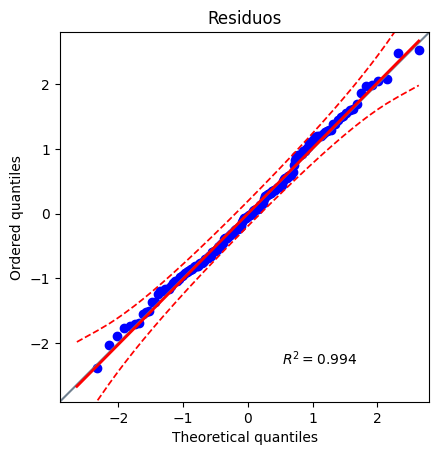

In [273]:
residuos = modelo_anova.resid
pg.qqplot(residuos, dist='norm')
plt.title('Residuos')

In [274]:
#Veamos normalidad aplicando una prueba Omnibus (normaltest). Se recomienda usar esta para muestras grandes
pg.normality(residuos, method='normaltest')


,W,pval,normal
0,0.164858,0.920877,True


Los residuos se comportan como una distribución normal por lo es una buena manera de verificar la validez del modelo. Además, con esto cumplimos con el supuesto del análisis de ANOVA en el que los residuos y la variable dependiente se comportan de forma normal.

Text(0, 0.5, 'Residuos')

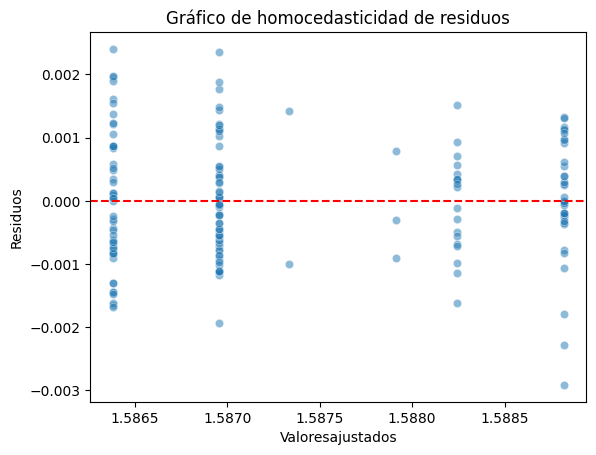

In [275]:
#Test de homocedasticidad
valores_estimados = modelo_anova.predict()
sns.scatterplot(x=modelo_anova.fittedvalues, y=residuos, alpha=0.5)
plt.title('Gráfico de homocedasticidad de residuos')
plt.xlabel('Valoresajustados')
plt.axhline(y=0, color='r', linestyle='--')  # Línea de referencia en cero
plt.ylabel('Residuos')
#plt.xlim(1.5860, 1.5875)

Del gráfico vemos que no existe homocedasticidad de los errores, esto indica que no hay una igual dispersión en los errores de nuestro modelo lo cual es un aviso de que nuestro modelo no es tan generalizable, es decir, no es muy bueno para predecir correctamente los valores de $Y$. Esto se explica debido a que únicamente estamos considerando dos variables de todas las presentes, por lo que desde un momento era de esperarse que el modelo no predijera correctamente los valores de precio por la falta de integración de demás variables significativas. 

### Aplicación del modelo de regresión

Habiendo identificado las variables significativas elegidas y habiendo aplicado un modelo ANOVA, procedemos a aplicar un modelo de regresión utilizando las variables categóricas seleccionadas junto con nuevas variables numéricas. 


In [276]:
Regre = Autos.copy()
Regre['Price_transf'] = transformed_price
c = Regre[(Regre['Car_body']=='convertible') | (Regre['Car_body']=='hardtop') | (Regre['Car_body']=='wagon')].index  # Índices a eliminar del dataframe
Regre = Regre.drop(c)
Regre.head()

,Symboling,Car_name,Fuel_type,Car_body,Drive_wheel,Engine_loc,Wheel_base,Length,Width,Height,...,Cylinder_num,Engine_size,Stroke,Comp_ratio,Horse_power,Peak_rpm,City_mpg,Highway_mpg,Price,Price_transf
2,1,alfa-romero Quadrifoglio,gas,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,six,152,3.47,9.0,154,5000,19,26,16500.0,1.588578
3,2,audi 100 ls,gas,sedan,fwd,front,99.8,176.6,66.2,54.3,...,four,109,3.40,10.0,102,5500,24,30,13950.0,1.588181
4,2,audi 100ls,gas,sedan,4wd,front,99.4,176.6,66.4,54.3,...,five,136,3.40,8.0,115,5500,18,22,17450.0,1.588702
5,2,audi fox,gas,sedan,fwd,front,99.8,177.3,66.3,53.1,...,five,136,3.40,8.5,110,5500,19,25,15250.0,1.588397
6,1,audi 100ls,gas,sedan,fwd,front,105.8,192.7,71.4,55.7,...,five,136,3.40,8.5,110,5500,19,25,17710.0,1.588734


Procedemos a hacer modelos de regresión para cada una de las variables seleccionadas con el fin de observar sus valores estadísticos y construir un modelo general. 

                            OLS Regression Results                            
Dep. Variable:           Price_transf   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     220.5
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           3.30e-64
Time:                        03:59:49   Log-Likelihood:                 1017.3
No. Observations:                 166   AIC:                            -2025.
Df Residuals:                     161   BIC:                            -2009.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.5776      0.002    635.075      

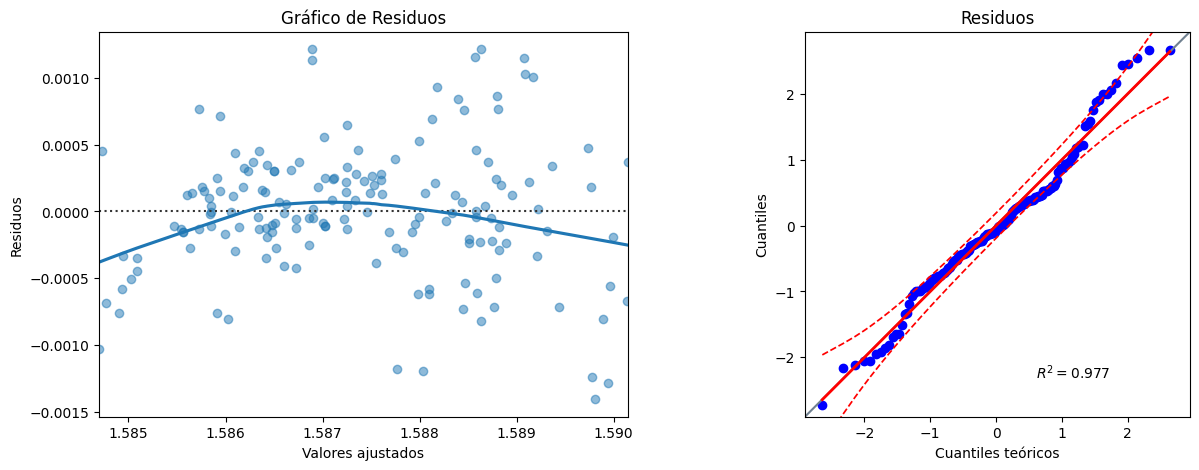

In [299]:
X=Regre[['Length', 'Weight', 'Width','Engine_size']]
y=Regre["Price_transf"]
X = sm.add_constant(X)
modelo = sm.OLS(y, X).fit()
print(modelo.summary())


#------------------------------------------------------------------------------------#
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.residplot(y=modelo.resid, x=y, lowess=True, scatter_kws={'alpha': 0.5}, ax=axs[0])
axs[0].set_title('Gráfico de Residuos')
axs[0].set_xlabel('Valores ajustados')
axs[0].set_ylabel('Residuos')

#sns.regplot(x=Regre['Length'], y=y, data=Regre, ci=95)
pg.qqplot(modelo.resid, dist='norm')
axs[1].set_title('Residuos')
axs[1].set_xlabel('Cuantiles teóricos')
axs[1].set_ylabel('Cuantiles')
plt.show()
#-------------------------------------------------------------------------------------#


In [302]:
#Contruimos la ecuación del modelo:
coeficientes = modelo.params
constante = coeficientes['const']

# Los demás coeficientes
otros_coeficientes = coeficientes.drop('const')

# Construye la ecuación del modelo
ecuacion = f'Y = {constante:.6f}'

for variable, coeficiente in otros_coeficientes.items():
    ecuacion += f' + {coeficiente:.6f} * {variable}'

print(ecuacion)


Y = 1.577558 + 0.000015 * Length + 0.000002 * Weight + 0.000031 * Width + -0.000005 * Engine_size


In [282]:
Regre2 = pd.get_dummies(Anova1_1[['Car_body','Drive_wheel']], columns=['Car_body','Drive_wheel'], prefix=['Car_body','Drive_wheel'])
df1 = pd.concat([X, Regre2], axis=1)
df1

,Car_body_hatchback,Car_body_sedan,Drive_wheel_4wd,Drive_wheel_fwd,Drive_wheel_rwd
2,1,0,0,0,1
3,0,1,0,1,0
4,0,1,1,0,0
5,0,1,0,1,0
6,0,1,0,1,0
...,...,...,...,...,...
200,0,1,0,0,1
201,0,1,0,0,1
202,0,1,0,0,1
203,0,1,0,0,1


                            OLS Regression Results                            
Dep. Variable:           Price_transf   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     131.1
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           1.85e-62
Time:                        04:09:34   Log-Likelihood:                 1021.4
No. Observations:                 166   AIC:                            -2027.
Df Residuals:                     158   BIC:                            -2002.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.8599      0

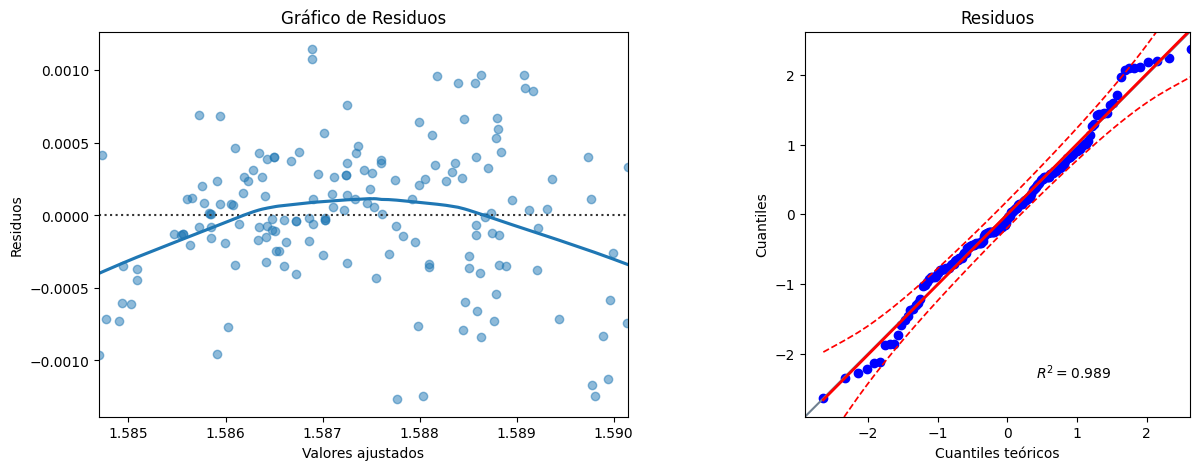

In [303]:
X1= sm.add_constant(df1)
modelo = sm.OLS(y, X1).fit()
print(modelo.summary())


fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.residplot(y=modelo.resid, x=y, lowess=True, scatter_kws={'alpha': 0.5}, ax=axs[0])
axs[0].set_title('Gráfico de Residuos')
axs[0].set_xlabel('Valores ajustados')
axs[0].set_ylabel('Residuos')

#sns.regplot(x=Regre['Length'], y=y, data=Regre, ci=95)
pg.qqplot(modelo.resid, dist='norm')
axs[1].set_title('Residuos')
axs[1].set_xlabel('Cuantiles teóricos')
axs[1].set_ylabel('Cuantiles')
plt.show()

In [304]:
#Contruimos la ecuación del modelo:
coeficientes = modelo.params
constante = coeficientes['const']

# Los demás coeficientes
otros_coeficientes = coeficientes.drop('const')

# Construye la ecuación del modelo
ecuacion = f'Y = {constante:.6f}'

for variable, coeficiente in otros_coeficientes.items():
    ecuacion += f' + {coeficiente:.6f} * {variable}'

print(ecuacion)


Y = 0.859894 + 0.000016 * Length + 0.000002 * Weight + 0.000060 * Width + -0.000004 * Engine_size + 0.429913 * Car_body_hatchback + 0.429980 * Car_body_sedan + 0.286690 * Drive_wheel_4wd + 0.286428 * Drive_wheel_fwd + 0.286776 * Drive_wheel_rwd


Verificamos condiciones para realizar ANOVA:

**Normalidad de los datos:**

La variable cuantitativa debe de distribuirse de forma normal en cada uno de los grupos. El estudio de normalidad puede hacerse de forma gráfica (qqplot) o con test de hipótesis.
Sin embargo, lo que vamos a realizar es el análisis de normalidad pero para el error por lo que se explica en la parte de comentarios.

Procedemos al análisis **Anova**

De la gráfica anterior vemos gracias al swarm plot que los datos sí se compartan de una manera simétrica. Sin embargo podemos intentar quitando los datos atípicos para verificar si contribuyen con ruido al análisis.

### Comentarios 
Obtén modelo de ANOVA con las variables categóricas seleccionadas y la que resulte más significativa utilizala en el modelo de Regresión para ver cómo esa variable categórica significativa se relaciona con las demás variables numéricas. 

En el modelo de anova mantenemos a XB_0 como fijo. Lo que hacemos es centrarnos en el error e. Esto es debido a que B es el peso que tiene la variable X en Y y la parte sobrante que no puede predecir en X (con el valor de B) se va al error, entonces todas esas partes que les faltan a cada X se van al error. Por eso la importancia de analizarlo.